In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('learningSet.csv')
data.shape

C:\Users\jmcso\AppData\Local\Temp\ipykernel_5508\3302850674.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


(95412, 481)

In [3]:
data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))

In [4]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

# Complete the following steps on the categorical columns in the dataset:
### Check for null values in all the columns

In [5]:
data.isnull().sum()

ODATEDW       0
OSOURCE     928
TCODE         0
STATE         0
ZIP           0
           ... 
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
CLUSTER2    132
GEOCODE2    319
Length: 481, dtype: int64

In [6]:
categorical = data.select_dtypes(object)
categorical.head()
categorical.shape

(95412, 74)

In [7]:
nulls_percent_df = pd.DataFrame(categorical.isna().sum()/len(categorical)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
columns_w_nulls = nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].reset_index(drop= True)
columns_w_nulls

,column_name,nulls_percentage
0,OSOURCE,0.009726
1,PVASTATE,0.984719
2,NOEXCH,0.000073
3,RECINHSE,0.929747
4,RECP3,0.978860
...,...,...
59,RFA_21,0.369052
60,RFA_22,0.268813
61,RFA_23,0.589800
62,RFA_24,0.387509


# Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:
### OSOURCE - symbol definitions not provided, too many categories
### ZIP - we are including state already

In [8]:
drop_list = []
drop_list.extend(["OSOURCE", "ZIP"])
drop_list

['OSOURCE', 'ZIP']

### Identify columns that have over 50% missing values.

In [9]:
columns_above_threshold = columns_w_nulls[columns_w_nulls['nulls_percentage']>0.5]
columns_above_threshold['column_name']
drop_columns_list = list(columns_above_threshold['column_name'])
drop_list.extend(drop_columns_list)
len(drop_list)

38

##### Keeping solih and veterans as asked

In [10]:
names_to_remove = ["VETERANS", "SOLIH"]

for name in names_to_remove:
    if name in drop_list:
        drop_list.remove(name)
    
len(drop_columns_list)

36

# Removing columns from df

In [11]:
data = data.drop(drop_list, axis=1)

In [12]:

data.shape

(95412, 445)

# Perform all of the cleaning processes from the Lesson.

### Remove columns with null values greater than a specified threshold (0.25 of all the dataframe) KEEPING: "WEALTH1", "WEALTH2" ,"VETERANS", "SOLIH"

In [13]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

In [14]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
columns_above_threshold['column_name']
drop_columns_list = list(columns_above_threshold['column_name'])
len(drop_columns_list)

83

In [15]:
names_to_remove = ["WEALTH1", "WEALTH2" ,"VETERANS", "SOLIH"]

for name in names_to_remove:
    if name in drop_columns_list:
        drop_columns_list.remove(name)
    


In [16]:

data = data.drop(drop_columns_list, axis=1)
data.shape

(95412, 366)

### Replacing Nans for N in veterans

In [17]:

data["VETERANS"].unique()

array([nan, 'Y'], dtype=object)

In [18]:

data['VETERANS'] = data['VETERANS'].fillna("N")
data["VETERANS"].unique()

array(['N', 'Y'], dtype=object)

### Reducing states

In [19]:
data["STATE"].value_counts()

CA    17343
FL     8376
TX     7535
IL     6420
MI     5654
NC     4160
WA     3577
GA     3403
IN     2980
WI     2795
MO     2712
TN     2492
AZ     2407
OR     2183
MN     2175
CO     2032
SC     1759
AL     1705
KY     1620
OK     1617
LA     1594
KS     1294
IA     1271
AR     1020
MS      986
NV      979
NM      877
NE      754
UT      569
ID      533
MT      527
HI      449
SD      301
WY      283
AK      282
ND      260
AP       81
NY       71
VA       55
OH       52
PA       38
MD       34
NJ       26
MA       25
CT       23
AA       18
AE       15
ME       11
NH        8
VT        7
RI        6
VI        5
WV        4
GU        4
DE        3
DC        1
AS        1
Name: STATE, dtype: int64

In [20]:
df = pd.DataFrame(data['STATE'].value_counts()).reset_index()
df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])
def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
data['STATE'] = list(map(clean_state, data['STATE']))

In [21]:
data["STATE"].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

### Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

##### Note that there are a few null values in the column. We will first replace those null values using the code below:

In [22]:

data['GENDER'].isna().sum()

2957

In [23]:

data['GENDER'] = data['GENDER'].fillna("F")
data["GENDER"].unique()

array(['F', 'M', 'C', 'U', 'J', 'A'], dtype=object)

In [24]:

data['GENDER'].value_counts()

F    54234
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [25]:
df = pd.DataFrame(data['GENDER'].value_counts()).reset_index()
df.columns = ['gender', 'count']
df

,gender,count
0,F,54234
1,M,39094
2,U,1715
3,J,365
4,C,2
5,A,2


In [26]:
unique_values = df['gender'].unique()
other_genders = [value for value in unique_values if value not in ["F", "M"]]
other_genders

['U', 'J', 'C', 'A']

In [27]:
def clean_gender(x):
    if x in other_genders:
        return 'other'
    else:
        return x
    
data['GENDER'] = list(map(clean_gender, data['GENDER']))
data["GENDER"].value_counts()

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [28]:
data['DOMAIN'] = data['DOMAIN'].fillna('R2')
data['DOMAIN_A'] = list(map(lambda x: x[0], data['DOMAIN']))
data['DOMAIN_B'] = list(map(lambda x: x[1], data['DOMAIN']))
data = data.drop(columns=['DOMAIN'])

In [29]:
drop_list_1 = ['MDMAUD_R', 'MDMAUD_F','MDMAUD_A']

In [30]:

data['CLUSTER'] = data['CLUSTER'].fillna('40')

In [31]:
data['DATASRCE'] = data['DATASRCE'].fillna('0')

In [32]:
data['GEOCODE2'] = data['GEOCODE2'].fillna('A')

In [33]:

data = data.loc[:, ~data.columns.str.startswith('ADATE_')]

In [34]:
data['HOMEOWNR'] = data['HOMEOWNR'].fillna('U') 

In [35]:
for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list_1.append(col_name)      

In [36]:
drop_list_1.remove('RFA_2R')
drop_list_1 = [item for item in drop_list_1 if item not in ('RFA_2A', 'RFA_5', 'RFA_10', 'RFA_13', 'RFA_15', 'RFA_17', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24')]
drop_list_1

['MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18']

In [37]:

data = data.drop(columns=drop_list_1)

In [38]:

data["SOLIH"].value_counts(dropna=False)

NaN    89212
12      5693
0        296
1         94
2         75
3         19
4         16
6          7
Name: SOLIH, dtype: int64

In [39]:

#ASSUMPTION SPAM EVERYONE ONCE A MONTH: NAN = 12
data['SOLIH'] = data['SOLIH'].fillna('12') 

In [40]:
categorical = data.select_dtypes(object)

In [41]:
categorical.isna().sum()

STATE       0
MAILCODE    0
NOEXCH      7
MDMAUD      0
CLUSTER     0
HOMEOWNR    0
GENDER      0
DATASRCE    0
SOLIH       0
VETERANS    0
RFA_2R      0
RFA_2A      0
GEOCODE2    0
DOMAIN_A    0
DOMAIN_B    0
dtype: int64

# __________________________________________________END OF LAB _________________________________________________

# Lab Feature engineering

# Check for null values in the numerical columns.

In [42]:

numerical = data.select_dtypes(include=[np.number])

In [43]:
numerical

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292

In [44]:
nulls_percent_num = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
nulls_percent_num.columns = ['column_name', 'nulls_percentage']
columns_w_nulls_num = nulls_percent_num[nulls_percent_num['nulls_percentage']!=0].reset_index(drop= True)
columns_w_nulls_num

,column_name,nulls_percentage
0,AGE,0.248030
1,INCOME,0.223096
2,WEALTH1,0.468830
3,WEALTH2,0.459303
4,MSA,0.001383
5,ADI,0.001383
6,DMA,0.001383
7,NEXTDATE,0.104526
8,TIMELAG,0.104526
9,CLUSTER2,0.001383


### After going through the lesson techniques there should only be 5 columns left with NaN values to clean.

In [45]:

data['AGE'] = data["AGE"].fillna(np.mean(data['AGE']))

In [46]:
data['INCOME'] = data['INCOME'].fillna(5.0)

In [47]:
data['CLUSTER2'] = data['CLUSTER2'].fillna(np.ceil(np.mean(data['CLUSTER2'])))

In [48]:
data['TIMELAG'] = data['TIMELAG'].fillna(0)

In [49]:

numerical = data.select_dtypes(include=[np.number])

In [50]:
nulls_percent_num = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
nulls_percent_num.columns = ['column_name', 'nulls_percentage']
columns_w_nulls_num = nulls_percent_num[nulls_percent_num['nulls_percentage']!=0].reset_index(drop= True)
columns_w_nulls_num

,column_name,nulls_percentage
0,WEALTH1,0.468830
1,WEALTH2,0.459303
2,MSA,0.001383
3,ADI,0.001383
4,DMA,0.001383
5,NEXTDATE,0.104526


# Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [51]:
data["WEALTH1"].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [52]:

data = data.drop("WEALTH1", axis=1)

##### Decided to drop wealth1

In [53]:
data["WEALTH2"].value_counts(dropna=False)

NaN    43823
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: WEALTH2, dtype: int64

# Filling WEALTH2 Nans with 0

In [54]:

data["WEALTH2"] = data['WEALTH2'].fillna(0)

In [55]:
data["WEALTH2"].value_counts(dropna=False)

0.0    47100
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
Name: WEALTH2, dtype: int64

In [56]:
data["MSA"].value_counts(dropna=False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

##### Filling MSA nans with 0(mode)

In [57]:
data['MSA'] = data['MSA'].fillna(0)

In [58]:
data["ADI"].value_counts(dropna=False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

### Use appropriate EDA technique where ever necessary.

C:\Users\jmcso\AppData\Local\Temp\ipykernel_5508\763747731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['ADI'])


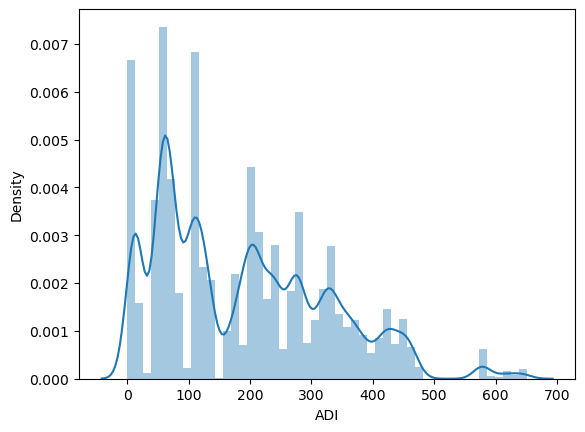

In [59]:
sns.distplot(numerical['ADI'])
plt.show()

### Filling ADI nan with mean

In [60]:

data['ADI'] = data['ADI'].fillna(np.ceil(np.mean(data['ADI'])))

In [61]:
data["DMA"].value_counts(dropna=False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

C:\Users\jmcso\AppData\Local\Temp\ipykernel_5508\1332464480.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['DMA'])


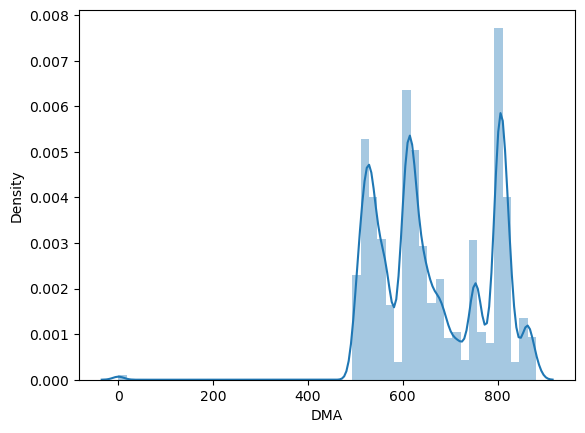

In [62]:
sns.distplot(numerical['DMA'])
plt.show()

### Filling DMA with mean

In [63]:

data['DMA'] = data['DMA'].fillna(np.ceil(np.mean(data['DMA'])))

In [64]:

data["NEXTDATE"].value_counts(dropna=False)

NaN       9973
9504.0    2253
9412.0    1970
8703.0    1959
9512.0    1870
          ... 
8107.0       1
7408.0       1
8207.0       1
8104.0       1
8412.0       1
Name: NEXTDATE, Length: 189, dtype: int64

C:\Users\jmcso\AppData\Local\Temp\ipykernel_5508\2905960302.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['NEXTDATE'])


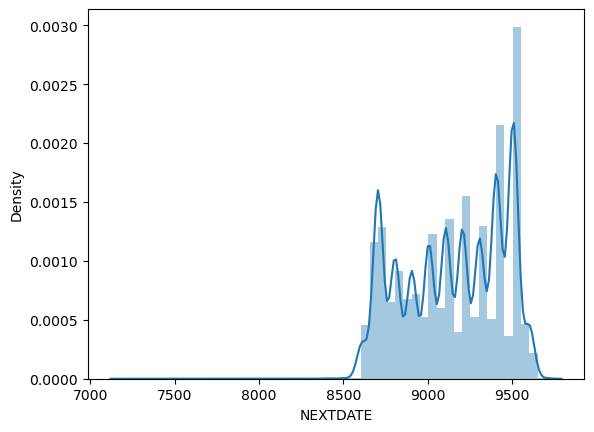

In [65]:
sns.distplot(numerical['NEXTDATE'])
plt.show()

# Dropping next date?? Confirm later!

In [66]:
data = data.drop("NEXTDATE", axis=1)

In [67]:
nulls_percent_num = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_num.columns = ['column_name', 'nulls_percentage']
columns_w_nulls_num = nulls_percent_num[nulls_percent_num['nulls_percentage']!=0].reset_index(drop= True)
columns_w_nulls_num

,column_name,nulls_percentage
0,NOEXCH,0.000073


### dropping NOEXCH

In [68]:
data = data.drop("NOEXCH", axis=1)

# ____________________________________________________________END OF THE LAB ____________________________________________________________

# Lab | Handling Data Imbalance in Classification Models

Begin the Modeling here

Look critically at the dtypes of numerical and categorical columns and make changes where appropriate.
Concatenate numerical and categorical back together again for your X dataframe. Designate the TargetB as y.
Split the data into a training set and a test set.
Split further into train_num and train_cat. Also test_num and test_cat.
Scale the features either by using MinMax Scaler or a Standard Scaler. (train_num, test_num)
Encode the categorical features using One-Hot Encoding or Ordinal Encoding. (train_cat, test_cat)
fit only on train data, transform both train and test
again re-concatenate train_num and train_cat as X_train as well as test_num and test_cat as X_test
Fit a logistic regression model on the training data.
Check the accuracy on the test data.
Note: So far we have not balanced the data.

Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model has changed.

# Look critically at the dtypes of numerical and categorical columns and make changes where appropriate. 

In [69]:
categorical  = data.select_dtypes(include='object')
categorical

,STATE,MAILCODE,MDMAUD,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,A,XXXX,36,U,F,0,12,N,L,E,C,T,2
1,CA,A,XXXX,14,H,M,3,12,N,L,G,A,S,1
2,NC,A,XXXX,43,U,M,3,12,N,L,E,C,R,2
3,CA,A,XXXX,44,U,F,3,12,N,L,E,C,R,2
4,FL,A,XXXX,16,H,F,3,12,N,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,A,XXXX,27,U,M,0,12,N,L,G,C,C,2
95408,TX,A,XXXX,24,H,M,3,12,N,L,F,A,C,1
95409,MI,A,XXXX,30,U,M,0,12,N,L,E,B,C,3
95410,CA,A,XXXX,24,H,F,2,12,N,L,F,A,C,1


In [70]:
numerical= data.select_dtypes(include=[np.number])
numerical

,ODATEDW,TCODE,DOB,AGE,INCOME,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,5.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.000000,6.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,61.611649,3.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,

In [71]:
# converting cluster, datasrce ,solih and domain_b to numerical
columns_to_convert = ['CLUSTER', 'DATASRCE', 'SOLIH', 'DOMAIN_B']

# Convert selected columns to numeric
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric)




In [73]:
categorical  = data.select_dtypes(include='object')
categorical

,STATE,MAILCODE,MDMAUD,HOMEOWNR,GENDER,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,IL,A,XXXX,U,F,N,L,E,C,T
1,CA,A,XXXX,H,M,N,L,G,A,S
2,NC,A,XXXX,U,M,N,L,E,C,R
3,CA,A,XXXX,U,F,N,L,E,C,R
4,FL,A,XXXX,H,F,N,L,F,A,S
...,...,...,...,...,...,...,...,...,...,...
95407,other,A,XXXX,U,M,N,L,G,C,C
95408,TX,A,XXXX,H,M,N,L,F,A,C
95409,MI,A,XXXX,U,M,N,L,E,B,C
95410,CA,A,XXXX,H,F,N,L,F,A,C


In [72]:
numerical= data.select_dtypes(include=[np.number])
numerical

,ODATEDW,TCODE,DOB,CLUSTER,AGE,INCOME,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLIH,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B
0,8901,0,3712,36,60.000000,5.0,0,0,0,39,34,18,10,2,1,12,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,4.0,7.741935,95515,0,0.0,0,4,39.0,2
1,9401,1,5202,14,46.000000,6.0,16,3,0,15,55,11,6,2,1,12,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,18.0,15.666667,148535,0,0.0,0,2,1.0,1
2,9001,1,0,43,61.611649,3.0,2,3,0,20,29,33,6,8,1,12,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6

# Concatenate numerical and categorical back together again for your X dataframe. Designate the TargetB as y.

In [75]:
data = data.drop("MDMAUD", axis=1)
data

,ODATEDW,TCODE,STATE,MAILCODE,DOB,CLUSTER,AGE,HOMEOWNR,INCOME,GENDER,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLIH,WEALTH2,VETERANS,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,CLUSTER2,GEOCODE2,DOMAIN_A,DOMAIN_B
0,8901,0,IL,A,3712,36,60.000000,U,5.0,F,0,0,0,39,34,18,10,2,1,12,5.0,N,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,4.0,7.741935,95515,0,0.0,0,L,4,E,39.0,C,T,2
1,9401,1,CA,A,5202,14,46.000000,H,6.0,M,16,3,0,15,55,11,6,2,1,12,9.0,N,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,18.0,15.666667,148535,0,0.0,0,L,2,G,1.0,A,S,1
2,9001,1,NC,A,0,43,61.611649,U,3.0,M,2,3,0,20,29,33,6,8,1,12,1.0,N,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3

In [78]:
y = data["TARGET_B"]
X = data.drop(['TARGET_B'], axis=1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1337)

# Split further into train_num and train_cat. Also test_num and test_cat.

In [95]:
train_num = X_train.select_dtypes(include=[np.number])

In [96]:
train_cat = X_train.select_dtypes(include='object')


In [97]:
test_num =  X_test.select_dtypes(include=[np.number])

In [98]:
test_cat = X_test.select_dtypes(include='object')


# Scale the features either by using MinMax Scaler or a Standard Scaler. 

In [99]:

transformer = MinMaxScaler().fit(train_num)

In [100]:
train_num_norm = pd.DataFrame(transformer.transform(train_num), columns=train_num.columns)
test_num_norm = pd.DataFrame(transformer.transform(test_num), columns=test_num.columns)

# Encode the categorical features using One-Hot Encoding or Ordinal Encoding. (train_cat, test_cat)

In [101]:
encoder = OneHotEncoder().fit(train_cat) 

In [102]:
unique_values = [encoder.categories_[i] for i in range(len(train_cat.columns))]
train_encoded = pd.DataFrame(encoder.transform(train_cat).toarray(),columns=[f"{col}_{value}" for col, values in zip(train_cat.columns, unique_values) for value in values])
test_encoded = pd.DataFrame(encoder.transform(test_cat).toarray(),columns=[f"{col}_{value}" for col, values in zip(train_cat.columns, unique_values) for value in values])


# Re-concatenate train_num and train_cat as X_train as well as test_num and test_cat as X_test

In [104]:
X_train = pd.concat([train_num_norm, train_encoded], axis=1)
X_train

,ODATEDW,TCODE,DOB,CLUSTER,AGE,INCOME,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLIH,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,STATE_CA,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,MAILCODE_A,MAILCODE_B,HOMEOWNR_H,HOMEOWNR_U,GENDER_F,GENDER_M,GENDER_other,VETERANS_N,VETERANS_Y,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.713262,0.000000,0.648919,0.769231,0.350515,0.833333,0.000000,0.666667,0.000000,0.505051,0.161616,0.232323,0.070707,0.000000,0.000000,1.0,0.000000,0.006383,0.007406,0.008756,1.000000,0.0,0.000000,0.474747,0.535354,0.979798,0.020202,0.010101,0.010101,0.010101,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.445783,0.554217,0.626506,0.506173,0.592593,0.641975,0.253333,0.373737,0.424242,0.212121,0.131313,0.212121,0.141414,0.111111,0.151515,0.161616,0.122222,0.161616,0.121212,0.333333,0.212121,0.181818,0.353535,0.202020,0.343434,0.414141,0.343434,0.252525,0.131313,0.040404,0.020202,0.535354,0.141414,0.178082,0.202020,0.193846,0.290000,0.616162,0.616162,0.014286,0.383838,0.363636,0.313131,0.000000,0.000000,0.000000,0.079667,0.081500,0.230769,0.230769,0.565657,0.444444,0.919192,0.090909,0.000000,0.222222,0.575758,0.444444,0.131313,0.767677,0.242424,0.080808,0.00,0.080808,0.181818,0.303030,0.020619,0.200000,0.525253,0.292929,0.018182,0.010101,0.000000,0.000000,0.000000,0.000000,0.040404,0.424242,0.000000,0.070707,0.131313,0.458824,0.466667,0.180328,0.100,0.070707,0.303030,0.000000,0.080808,0.070707,0.272727,0.000000,0.010101,0.161616,0.656566,0.808081,0.752137,0.115207,0.691260,0.098667,0.213333,0.140000,0.202000,0.067384,0.515152,0.161616,0.101010,0.161616,0.070707,0.000000,0.00,0.000000,0.000000,0.262626,0.111111,0.212121,0.333333,0.090909,0.000000,0.00,0.000000,0.000000,0.444444,0.070707,0.454545,0.131313,0.535354,0.474747,0.090909,0.747475,0.222222,0.000000,0.000000,0.0,0.0,0.00,0.020202,0.020202,0.469880,0.191919,0.277778,0.355263,0.030303,0.585859,0.595960,0.767677,0.515152,0.585859,0.515152,1.000000,0.444444,1.000000,0.000000,0.000000,0.050505,0.141414,0.070707,0.232323,0.222222,0.000000,0.072727,0.060606,0.000000,0.080808,0.080808,0.000000,0.030303,0.000000,0.000000,0.000000

In [105]:
X_test = pd.concat([test_num_norm, test_encoded], axis=1)
X_test

,ODATEDW,TCODE,DOB,CLUSTER,AGE,INCOME,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLIH,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,STATE_CA,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,MAILCODE_A,MAILCODE_B,HOMEOWNR_H,HOMEOWNR_U,GENDER_F,GENDER_M,GENDER_other,VETERANS_N,VETERANS_Y,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.784946,0.000026,0.000000,0.134615,0.624862,0.666667,0.000000,0.000000,0.020202,0.191919,0.363636,0.161616,0.131313,0.010101,0.080460,1.0,0.000000,0.012816,0.010856,0.008333,1.0,0.000000,0.000000,0.535354,0.474747,0.181818,0.494949,0.000000,0.020202,0.515152,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.463918,0.000000,0.000000,0.081395,0.301205,0.433735,0.481928,0.345679,0.481481,0.530864,0.480000,0.383838,0.404040,0.222222,0.202020,0.262626,0.232323,0.151515,0.070707,0.060606,0.033333,0.151515,0.171717,0.313131,0.202020,0.171717,0.191919,0.060606,0.151515,0.111111,0.151515,0.757576,0.616162,0.414141,0.272727,0.494949,0.101010,0.068493,0.363636,0.544615,0.582857,0.979798,0.939394,0.014286,0.020202,0.010101,0.000000,0.000000,0.000000,0.000000,0.244167,0.246167,0.461538,0.461538,0.858586,0.151515,0.989899,0.020202,0.000000,0.656566,0.878788,0.646465,0.484848,0.939394,0.070707,0.161616,0.08,0.121212,0.080808,0.121212,0.020619,0.053333,0.101010,0.040404,0.272727,0.313131,0.030303,0.050505,0.464646,0.898990,0.979798,1.000000,0.00000,0.090909,0.383838,0.588235,0.555556,0.360656,0.200,0.020202,0.000000,0.000000,0.141414,0.010101,0.000000,0.000000,0.737374,0.898990,0.939394,0.959596,0.478632,0.019969,0.911464,0.235333,0.251333,0.262667,0.269333,0.049014,0.121212,0.090909,0.292929,0.252525,0.191919,0.040404,0.00,0.000000,0.020202,0.090909,0.111111,0.292929,0.252525,0.191919,0.050505,0.00,0.000000,0.020202,0.191919,0.111111,0.181818,0.080808,0.353535,0.656566,0.060606,0.646465,0.303030,0.050505,0.050505,0.0,0.0,0.0,0.010101,0.000000,0.000000,0.050505,0.344444,0.421053,0.030303,0.898990,0.636364,0.707071,0.555556,0.606061,0.474747,0.464646,0.282828,0.585859,0.090909,0.171717,0.131313,0.050505,0.040404,0.101010,0.202020,0.000000,0.018182,0.010101,0.000000,0.151515,0.202020,0.040404,0.070707,0.0

# Fit a logistic regression model on the training data.

In [115]:

model = LogisticRegression().fit(X_train, y_train)

C:\Users\jmcso\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
y_pred = model.predict(X_test)

In [117]:

accuracy_score(y_test, y_pred)

0.9820258869150553

# Check for the imbalance. Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes. Each time fit the model and see how the accuracy of the model has changed.

In [134]:
y_train = y_train.reset_index(drop=True)

In [135]:
train = pd.concat([X_train, y_train], axis=1)
train

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,MAILCODE_B,HOMEOWNR_U,GENDER_M,GENDER_other,VETERANS_Y,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,ODATEDW,TCODE,DOB,CLUSTER,AGE,INCOME,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLIH,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2,DOMAIN_B,TARGET_B
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.909091,0.000718,0.686889,0.788462,0.319588,0.666667,0.000000,1.000000,0.000000,0.285714,0.464646,0.181818,0.101695,0.034483,0.016949,1.0,0.000000,0.016884,0.018816,0.012626,0.000000,0.0,1.000000,0.535354,0.474747,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.397436,0.506329,0.5250,0.426667,0.552632,0.592105,0.436620,0.343434,0.393939,0.272727,0.118280,0.232323,0.272727,0.62500,0.070707,0.140351,0.060606,0.131313,0.340909,0.323232,0.222222,0.181818,0.178947,0.057143,0.159574,0.090909,0.388235,0.585859,0.404040,0.191919,0.050505,0.666667,0.070707,0.061224,0.247423,0.376923,0.448571,0.959596,0.949495,0.015152,0.030303,0.020202,0.000000,0.000000,0.000000,0.0,0.168500,0.177167,0.307692,0.153846,0.909091,0.101010,0.989899,0.020408,0.101010,0.484848,0.878788,0.757576,0.424242,0.939394,0.070707,0.090909,0.2,0.064516,0.146341,0.070707,0.071429,0.352113,0.656566,0.090909,0.000000,0.000000,0.000000,0.010101,0.101010,0.515152,0.878788,0.979798,0.000000,0.000000,0.747475,0.845238,0.784091,0.262295,0.210526,0.021978,0.000000,0.020202,0.070707,0.029412,0.000000,0.000000,0.141414,0.545455,0.797980,0.969697,0.547009,0.165891,0.695800,0.299333,0.306000,0.364974,0.374001,0.093816,0.090909,0.150943,0.297872,0.457627,0.292929,0.169811,0.02,0.047619,0.036585,0.060606,0.080808,0.241935,0.402985,0.303030,0.204545,0.02,0.090909,0.034483,0.181818,0.0250,0.565657,0.033708,0.303030,0.707071,0.042553,0.787879,0.134328,0.016129,0.016129,0.0,0.0,0.0,0.033333,0.137931,0.013333,0.353535,0.233333,0.464286,0.074074,0.686869,0.808081,0.888889,0.717172,0.858586,0.696970,0.767677,0.656566,0.919192,1.000000,0.000000,0.166667,0.176471,0.200000,0.134328,0.264706,0.00,0.023256,0.135135,0.071429,0.200000,0.195122,0.10,0.16,0.114286,0.

In [139]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [140]:
category_0 = data[data['TARGET_B'] == 0]
category_1 = data[data['TARGET_B'] == 1]

### Downsampling

In [141]:

category_0_undersampled = resample(category_0,
                                   replace=False,
                                   n_samples = len(category_1))

In [142]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

In [144]:
y = data_downsampled['TARGET_B']
X = data_downsampled.drop(['TARGET_B'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_num = X_train.select_dtypes(include='number')
train_cat = X_train.select_dtypes(include='object')

test_num = X_test.select_dtypes(include='number')
test_cat = X_test.select_dtypes(include='object')

minmax_fit = MinMaxScaler().fit(train_num)

train_num_trans = minmax_fit.transform(train_num)
test_num_trans = minmax_fit.transform(test_num)

train_num_trans = pd.DataFrame(train_num_trans, columns=train_num.columns)
test_num_trans = pd.DataFrame(test_num_trans, columns=train_num.columns)

onehot_fit = OneHotEncoder(drop='first', handle_unknown='ignore').fit(train_cat)

train_cat_enc = onehot_fit.transform(train_cat).toarray()
train_cat_enc = pd.DataFrame(train_cat_enc, columns=onehot_fit.get_feature_names_out(input_features=train_cat.columns))

test_cat_enc = onehot_fit.transform(test_cat).toarray()
test_cat_enc = pd.DataFrame(test_cat_enc, columns=onehot_fit.get_feature_names_out(input_features=train_cat.columns))

X_train = pd.concat([train_cat_enc, train_num_trans], axis=1)
X_test = pd.concat([test_cat_enc, test_num_trans], axis=1)

model = LogisticRegression().fit(X_train, y_train)

C:\Users\jmcso\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:

y_pred = model.predict(X_test)

In [146]:

accuracy_score(y_test, y_pred)

0.9613003095975232

# Upsampling

In [147]:
category_1_oversampled = resample(category_1,
                                  replace=True,
                                  n_samples = len(category_0))

In [148]:

data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [149]:
y = data_upsampled['TARGET_B']
X = data_upsampled.drop(['TARGET_B'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_num = X_train.select_dtypes(include='number')
train_cat = X_train.select_dtypes(include='object')

test_num = X_test.select_dtypes(include='number')
test_cat = X_test.select_dtypes(include='object')

minmax_fit = MinMaxScaler().fit(train_num)

train_num_trans = minmax_fit.transform(train_num)
test_num_trans = minmax_fit.transform(test_num)

train_num_trans = pd.DataFrame(train_num_trans, columns=train_num.columns)
test_num_trans = pd.DataFrame(test_num_trans, columns=train_num.columns)

onehot_fit = OneHotEncoder(drop='first', handle_unknown='ignore').fit(train_cat)

train_cat_enc = onehot_fit.transform(train_cat).toarray()
train_cat_enc = pd.DataFrame(train_cat_enc, columns=onehot_fit.get_feature_names_out(input_features=train_cat.columns))

test_cat_enc = onehot_fit.transform(test_cat).toarray()
test_cat_enc = pd.DataFrame(test_cat_enc, columns=onehot_fit.get_feature_names_out(input_features=train_cat.columns))

X_train = pd.concat([train_cat_enc, train_num_trans], axis=1)
X_test = pd.concat([test_cat_enc, test_num_trans], axis=1)

model = LogisticRegression().fit(X_train, y_train)

C:\Users\jmcso\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [150]:

y_pred = model.predict(X_test)

In [151]:

accuracy_score(y_test, y_pred)

0.9896764933200839

# Each time fit the model and see how the accuracy of the model has changed.

### Done in the last steps, the best accuracy score was reached by upsampling ( 0.9896764933200839)  followed by the logistic regression without resampling ( 0.9820258869150553) and the worst result was the output of the downsampling ( 0.9613003095975232)